<a href="https://colab.research.google.com/github/bmachin/metal-artwork-generator/blob/main/Metal_Artwork_Generator_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metal Artwork Generator Example

This is just a clone of the StyleGAN2-ADA repo with the code from their "generate.py" script broken down in order to load the networks only once, using a model I trained on metal albums cover artworks (https://www.kaggle.com/benjamnmachn/metal-albums-artwork).

StyleGAN-2 ADA runs on Tensorflow 1.x

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Clone StyleGAN-2 ADA repo:

In [ ]:
! git clone https://github.com/NVlabs/stylegan2-ada

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 71 (delta 2), reused 6 (delta 2), pack-reused 65
Unpacking objects: 100% (71/71), done.


Download pre-trained Metal Artwork Generator model:

In [53]:
!gdown --id 1RHdVxqbM261zUv4wHabTJCdyTG4KZKY5

Downloading...
From: https://drive.google.com/uc?id=1RHdVxqbM261zUv4wHabTJCdyTG4KZKY5
To: /content/metal-artwork-generator-20210215.pkl
364MB [00:01, 207MB/s]


Imports and load the networks from the pkl file:

In [54]:
import sys
sys.path.append('/content/stylegan2-ada')

import pickle
import os
import numpy as np
import PIL.Image

import dnnlib
import dnnlib.tflib as tflib
import matplotlib.pyplot as plt

In [55]:
network_pkl = '/content/metal-artwork-generator-20210215.pkl' 

tflib.init_tf()
print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)

Loading networks from "/content/metal-artwork-generator-20210215.pkl"...


Generate and display an image using a given seed. Feel free to change it and see what comes out!

Generating image for seed 666...


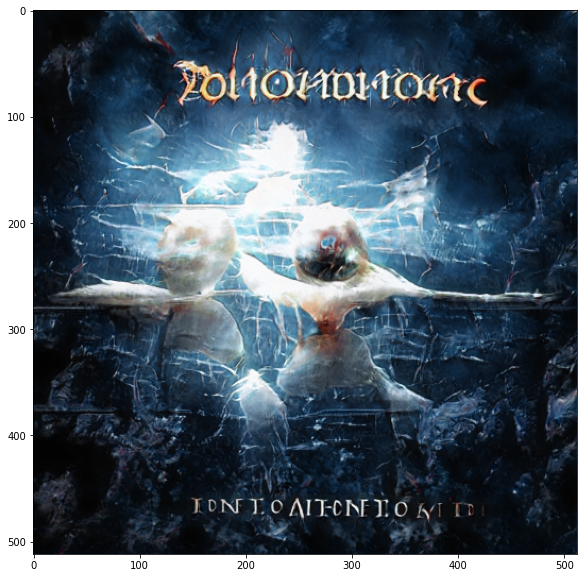

In [56]:
seed = 666
truncation_psi = 0.7


# Render images for dlatents initialized from random seeds.
Gs_kwargs = {
    'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
    'randomize_noise': False
}
if truncation_psi is not None:
    Gs_kwargs['truncation_psi'] = truncation_psi

noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
label = np.zeros([1] + Gs.input_shapes[1][1:])


print(f'Generating image for seed {seed}...')
rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
image = PIL.Image.fromarray(images[0], 'RGB')

plt.figure(figsize = (10,10))
plt.imshow(np.asarray(image))